Enter the number of nodes in the graph: 5
Enter node name: A
Enter heuristic value for node A: 7
Enter neighbors for node A in the format (neighbor cost), separated by commas (e.g., B 1, C 4): B 2, C 4
Enter node name: B
Enter heuristic value for node B: 6
Enter neighbors for node B in the format (neighbor cost), separated by commas (e.g., B 1, C 4): A 2, C 1, D 7
Enter node name: C
Enter heuristic value for node C: 2
Enter neighbors for node C in the format (neighbor cost), separated by commas (e.g., B 1, C 4): A 4, B 1, D 3, E 5
Enter node name: D
Enter heuristic value for node D: 1
Enter neighbors for node D in the format (neighbor cost), separated by commas (e.g., B 1, C 4): B 7, C 3, E 1
Enter node name: E
Enter heuristic value for node E: 0
Enter neighbors for node E in the format (neighbor cost), separated by commas (e.g., B 1, C 4): C 5, D 1
Enter the start node: A
Enter the goal node: E
Graph: {'A': [('B', 2), ('C', 4)], 'B': [('A', 2), ('C', 1), ('D', 7)], 'C': [('A', 4), ('B

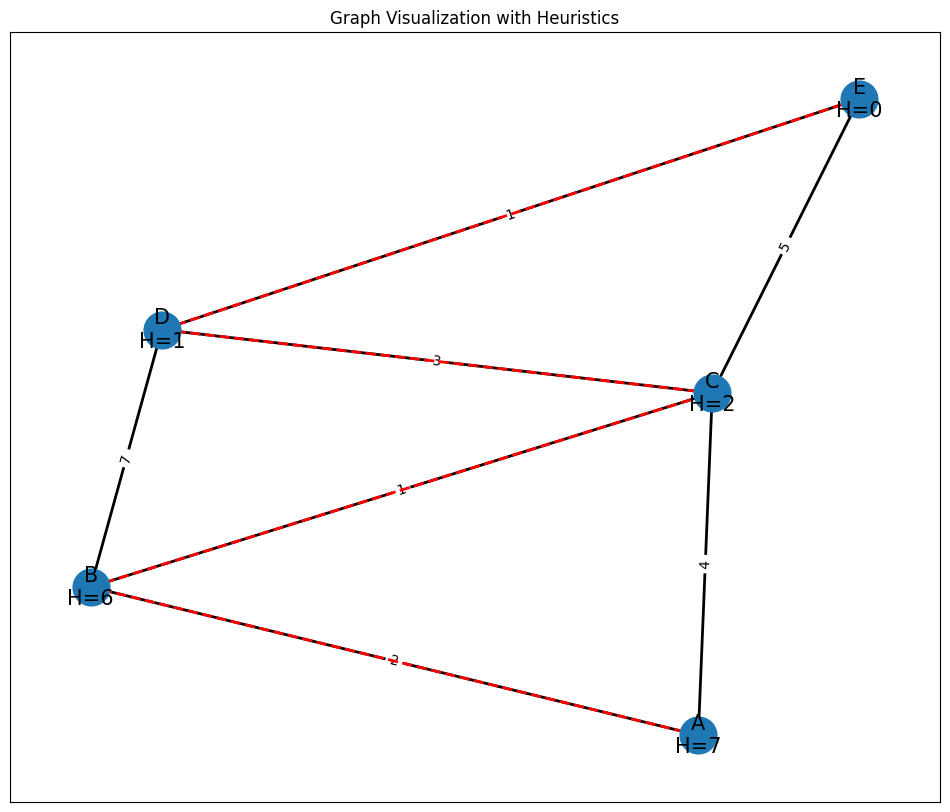

In [ ]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, name, cost=0, heuristic=0, parent=None):
        self.name = name
        self.cost = cost
        self.heuristic = heuristic
        self.parent = parent
        self.f = cost + heuristic  # f = g + h

    def __lt__(self, other):
        return self.f < other.f

    def __repr__(self):
        return f"Node(name={self.name}, f={self.f}, g={self.cost}, h={self.heuristic})"

def a_star_algorithm(graph, start, goal, heuristics):
    open_set = []
    heapq.heappush(open_set, Node(start, 0, heuristics[start]))
    came_from = {}
    cost_so_far = {start: 0}
    expanded_nodes = set()

    step = 0

    while open_set:
        current = heapq.heappop(open_set)
        expanded_nodes.add(current.name)

        print(f"Step {step}:")
        print("Fringe (Open Set):", [node for node in open_set])
        print("Expanded Node:", current)
        print("Expanded Nodes Set:", expanded_nodes)
        print()
        step += 1

        if current.name == goal:
            path = []
            while current:
                path.append(current.name)
                current = came_from.get(current.name)
            return path[::-1]

        for neighbor, cost in graph.get(current.name, []):
            new_cost = cost_so_far[current.name] + cost
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristics[neighbor]
                heapq.heappush(open_set, Node(neighbor, new_cost, heuristics[neighbor]))
                came_from[neighbor] = current

    return None

def draw_graph(graph, heuristics, path=None):
    G = nx.Graph()

    for node, neighbors in graph.items():
        for neighbor, cost in neighbors:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(12, 10))
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)})

    node_labels = {node: f'{node}\nH={heuristics[node]}' for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=15, font_family="sans-serif")

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, style='--')

    plt.title('Graph Visualization with Heuristics')
    plt.show()

def main():
    num_nodes = int(input("Enter the number of nodes in the graph: "))

    graph = {}
    heuristics = {}

    for _ in range(num_nodes):
        node = input(f"Enter node name: ")
        heuristics[node] = int(input(f"Enter heuristic value for node {node}: "))
        neighbors = input(f"Enter neighbors for node {node} in the format (neighbor cost), separated by commas (e.g., B 1, C 4): ")
        neighbors = [tuple(n.split()) for n in neighbors.split(',')]
        neighbors = [(n, int(cost)) for n, cost in neighbors]
        graph[node] = neighbors

    start = input("Enter the start node: ")
    goal = input("Enter the goal node: ")

    print("Graph:", graph)
    print("Heuristics:", heuristics)
    print("Start:", start)
    print("Goal:", goal)

    path = a_star_algorithm(graph, start, goal, heuristics)

    if path:
        print("Path found:", path)
    else:
        print("No path found.")

    draw_graph(graph, heuristics, path)

if __name__ == "__main__":
    main()
